In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan-train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
for col in df.columns:
    print(col,'dtype: ',df[col].dtype)

Loan_ID dtype:  object
Gender dtype:  object
Married dtype:  object
Dependents dtype:  object
Education dtype:  object
Self_Employed dtype:  object
ApplicantIncome dtype:  int64
CoapplicantIncome dtype:  float64
LoanAmount dtype:  float64
Loan_Amount_Term dtype:  float64
Credit_History dtype:  float64
Property_Area dtype:  object
Loan_Status dtype:  object


In [8]:
def fill_Na(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            if df[col].isnull().sum() > 0:
                # Find the most repeated value in the column
                most_repeated_value = df[col].value_counts().idxmax()
                df[col].fillna(most_repeated_value,inplace=True)
                print(col,most_repeated_value)
        elif df[col].dtype == 'int64' or df[col].dtype == 'float64':
            if df[col].isnull().sum() > 0:
                # Find the most repeated value in the column
                mean_value = df[col].mean()
                df[col].fillna(mean_value,inplace=True)
                print(col,mean_value)

In [9]:
fill_Na(df)

Gender Male
Married Yes
Dependents 0
Self_Employed No
LoanAmount 146.41216216216216
Loan_Amount_Term 342.0
Credit_History 0.8421985815602837


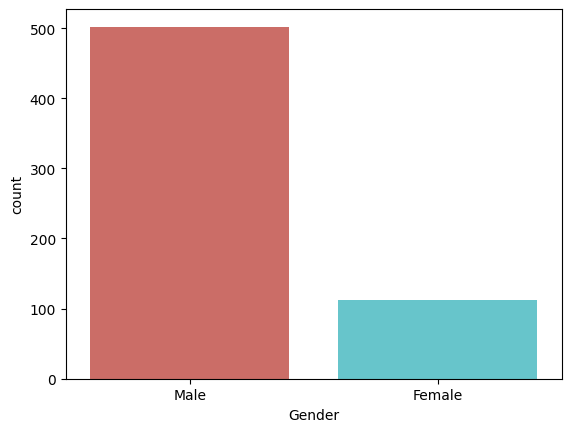

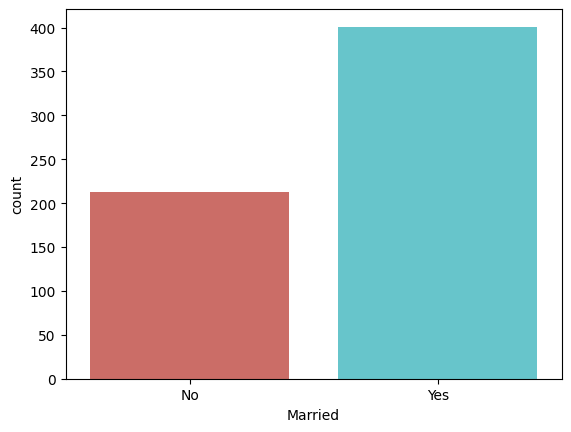

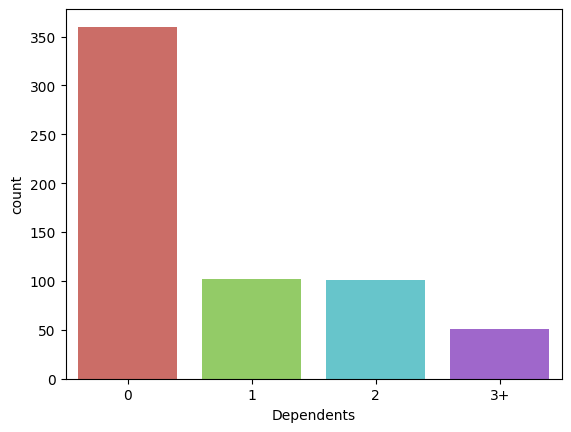

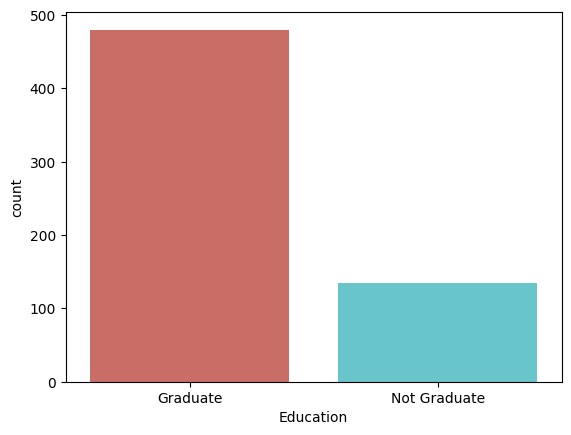

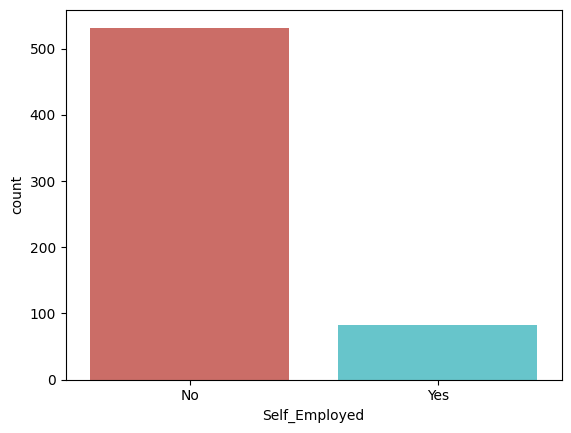

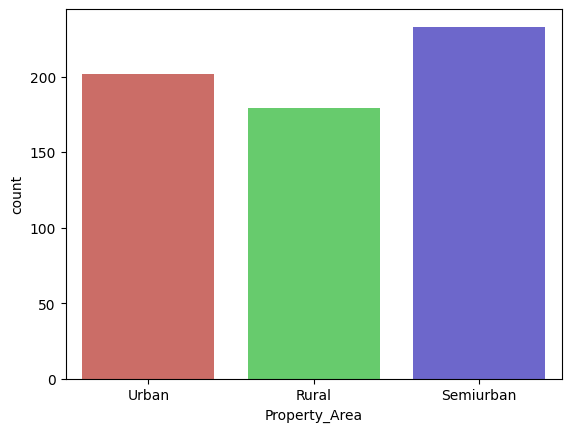

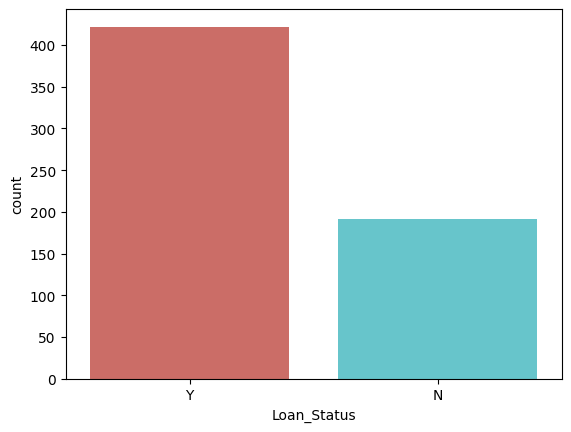

In [10]:
for col in df.columns:
   if df[col].dtype == 'object' and col != 'Loan_ID': 
       sns.countplot(x=col, data=df, palette="hls")
       plt.show()

In [11]:
#percentage of approved and rejected applicants
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%


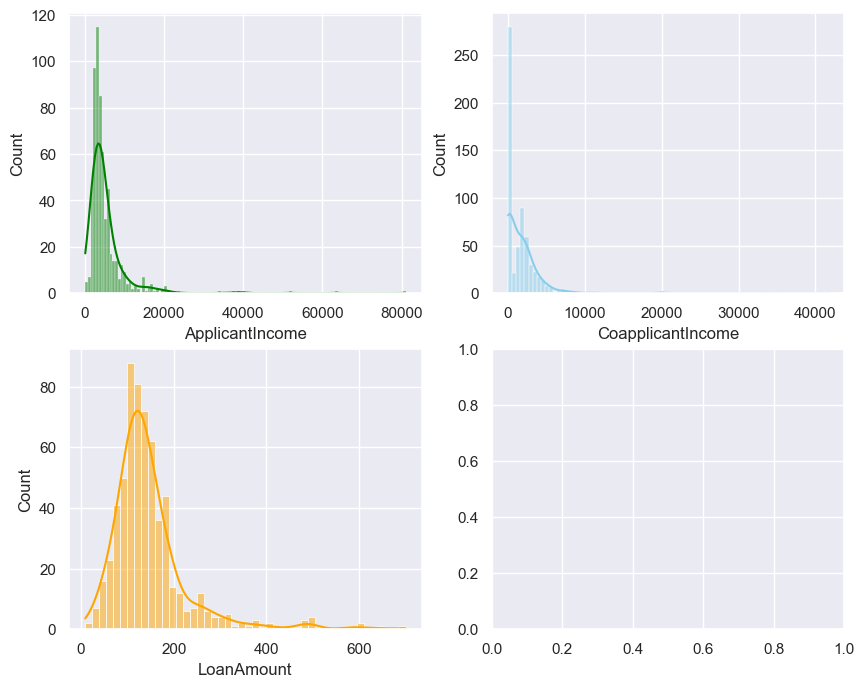

In [12]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

<Axes: >

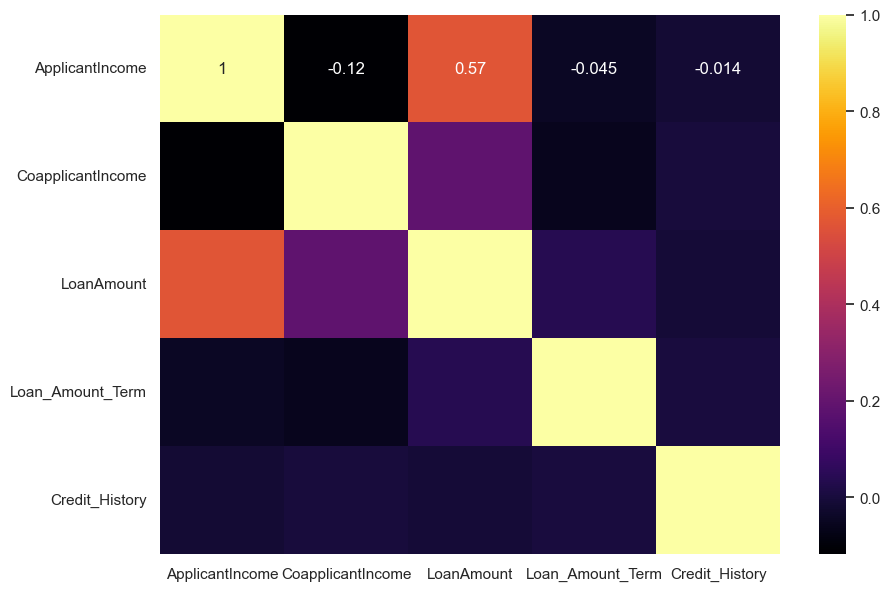

In [13]:
numeric_columns = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,7))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='inferno')

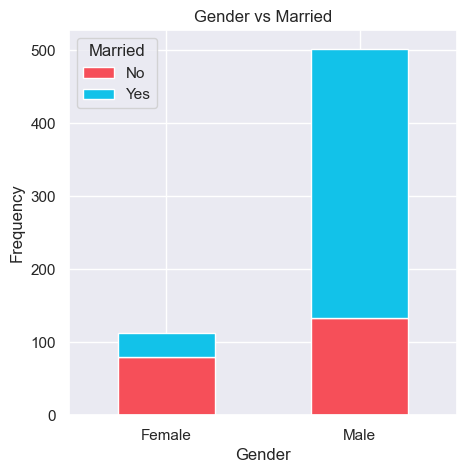

In [14]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

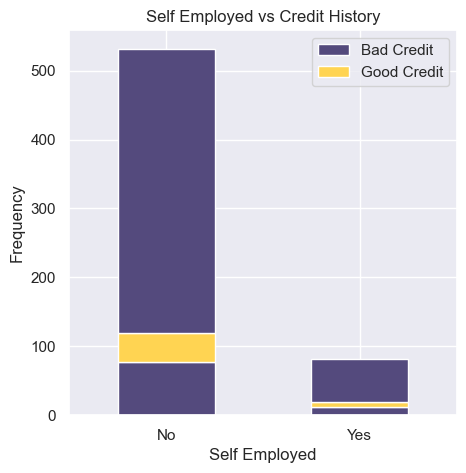

In [15]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

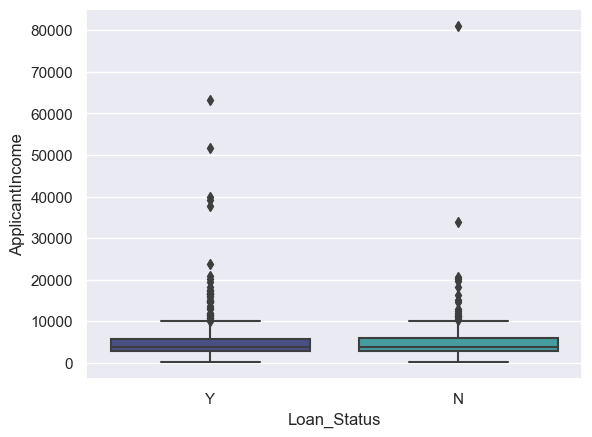

In [16]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

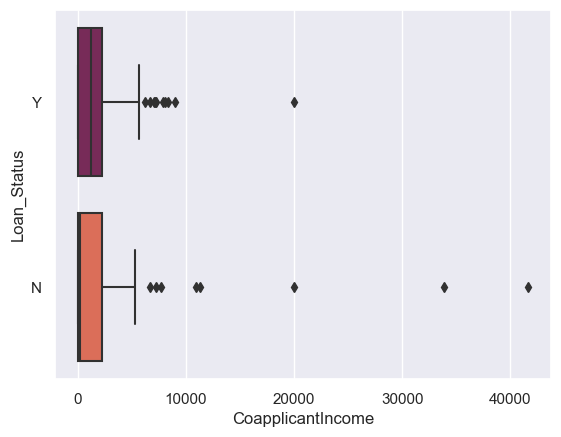

In [17]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");

In [18]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [20]:
def transform_data(df):
    df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
    df['Married'] = df['Married'].map({'Yes':1,'No':0})
    df['Dependents'] = df['Dependents'].map({'0':1,'1':0,'2':2,'3+':3})
    df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0})
    df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0})
    df['Property_Area'] = df['Property_Area'].map({'Urban':2,'Rural':0,'Semiurban':1})
    df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0})

In [21]:
transform_data(df)

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,1,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,0,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,1,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,1,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [23]:
X = df.drop(['Loan_ID',"Loan_Status"], axis=1)
y = df["Loan_Status"]

In [24]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,1,1,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,0,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,1,1,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,1,1,0,6000,0.0,141.000000,360.0,1.0,2


In [25]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [27]:
X = MinMaxScaler().fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
     ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]
results_df = pd.DataFrame(columns=['Model', 'Test Accuracy'])

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the performance metrics
    #print("Model:", name)
    #print("Test Accuracy:", accuracy)
    #print()
    results_df = pd.concat([results_df, pd.DataFrame({'Model': [name], 'Test Accuracy': [accuracy]})], ignore_index=True)
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline


print("Model Pipeline:", best_model, "with accuracy", "{:.2f}%".format(best_accuracy * 100))

Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(n_estimators=200, random_state=42))]) with accuracy 81.66%


In [37]:
import pickle
pickle.dump(best_model, open('loan_model.pkl', 'wb'))